<a href="https://colab.research.google.com/github/gomdoori/AI/blob/main/Tsutsugamushi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# 디바이스 할당
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('drive/MyDrive/Colab Notebooks/CNN/쯔쯔가무시증(신고데이터)_20052017.xlsx')

In [ ]:
data

,감염병명,성별,연령,발병일,진단일,신고일,신고연도,직업,관련사망(통계반영),주소지시도,주소지시군구,신고기관시도,신고기관시군구
0,쯔쯔가무시증,여,63,20051100,20051130,20051130,2005,(전업)주부,NaN,전남,여수시,전남,여수시
1,쯔쯔가무시증,남,44,20051111,20051118,20051121,2005,무직,NaN,부산,영도구,부산,영도구
2,쯔쯔가무시증,여,72,20051114,20051114,20051114,2005,농업 및 어업숙련 종사자,NaN,경기,화성시,NaN,NaN
3,쯔쯔가무시증,여,65,20051020,20051027,20051111,2005,농업 및 어업숙련 종사자,NaN,경북,경주시,경북,경주시
4,쯔쯔가무시증,여,66,20051006,20051026,20051031,2005,농업 및 어업숙련 종사자,NaN,광주,북구,광주,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99396,쯔쯔가무시증,여,81,20171230,20171231,20171231,2017,무직,NaN,전남,구례군,전남,순천시
99397,쯔쯔가무시증,남,77,20171224,20171230,20171230,2017,농업 및 어업숙련 종사자,NaN,충남,논산시,충남,논산시
99398,쯔쯔가무시증,여,0,20171230,20171230,20171231,2017,기타,NaN,충북,청주시상당구,충북,청주시 청원구
99399,쯔쯔가무시증,남,32,20171228,20171228,20171229,2017,전문가,NaN,서울,광진구,서울,성동구


In [ ]:
dataset=data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99401 entries, 0 to 99400
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   감염병명        99401 non-null  object
 1   성별          99401 non-null  object
 2   연령          99401 non-null  int64 
 3   발병일         99401 non-null  int64 
 4   진단일         99401 non-null  int64 
 5   신고일         99401 non-null  int64 
 6   신고연도        99401 non-null  int64 
 7   직업          99401 non-null  object
 8   관련사망(통계반영)  93 non-null     object
 9   주소지시도       99401 non-null  object
 10  주소지시군구      99015 non-null  object
 11  신고기관시도      83999 non-null  object
 12  신고기관시군구     83988 non-null  object
dtypes: int64(5), object(8)
memory usage: 9.9+ MB


In [ ]:
data['신고일']=data['신고일'].apply(lambda x : str(x))

In [ ]:
data

,감염병명,성별,연령,발병일,진단일,신고일,신고연도,직업,관련사망(통계반영),주소지시도,주소지시군구,신고기관시도,신고기관시군구
0,쯔쯔가무시증,여,63,20051100,20051130,20051130,2005,(전업)주부,NaN,전남,여수시,전남,여수시
1,쯔쯔가무시증,남,44,20051111,20051118,20051121,2005,무직,NaN,부산,영도구,부산,영도구
2,쯔쯔가무시증,여,72,20051114,20051114,20051114,2005,농업 및 어업숙련 종사자,NaN,경기,화성시,NaN,NaN
3,쯔쯔가무시증,여,65,20051020,20051027,20051111,2005,농업 및 어업숙련 종사자,NaN,경북,경주시,경북,경주시
4,쯔쯔가무시증,여,66,20051006,20051026,20051031,2005,농업 및 어업숙련 종사자,NaN,광주,북구,광주,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99396,쯔쯔가무시증,여,81,20171230,20171231,20171231,2017,무직,NaN,전남,구례군,전남,순천시
99397,쯔쯔가무시증,남,77,20171224,20171230,20171230,2017,농업 및 어업숙련 종사자,NaN,충남,논산시,충남,논산시
99398,쯔쯔가무시증,여,0,20171230,20171230,20171231,2017,기타,NaN,충북,청주시상당구,충북,청주시 청원구
99399,쯔쯔가무시증,남,32,20171228,20171228,20171229,2017,전문가,NaN,서울,광진구,서울,성동구


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99401 entries, 0 to 99400
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   감염병명        99401 non-null  object
 1   성별          99401 non-null  object
 2   연령          99401 non-null  int64 
 3   발병일         99401 non-null  int64 
 4   진단일         99401 non-null  int64 
 5   신고일         99401 non-null  object
 6   신고연도        99401 non-null  int64 
 7   직업          99401 non-null  object
 8   관련사망(통계반영)  93 non-null     object
 9   주소지시도       99401 non-null  object
 10  주소지시군구      99015 non-null  object
 11  신고기관시도      83999 non-null  object
 12  신고기관시군구     83988 non-null  object
dtypes: int64(4), object(9)
memory usage: 9.9+ MB


In [ ]:
import datetime

In [ ]:
data['신고일']=pd.to_datetime(data['신고일'])

In [ ]:
data

,감염병명,성별,연령,발병일,진단일,신고일,신고연도,직업,관련사망(통계반영),주소지시도,주소지시군구,신고기관시도,신고기관시군구
0,쯔쯔가무시증,여,63,20051100,20051130,2005-11-30,2005,(전업)주부,NaN,전남,여수시,전남,여수시
1,쯔쯔가무시증,남,44,20051111,20051118,2005-11-21,2005,무직,NaN,부산,영도구,부산,영도구
2,쯔쯔가무시증,여,72,20051114,20051114,2005-11-14,2005,농업 및 어업숙련 종사자,NaN,경기,화성시,NaN,NaN
3,쯔쯔가무시증,여,65,20051020,20051027,2005-11-11,2005,농업 및 어업숙련 종사자,NaN,경북,경주시,경북,경주시
4,쯔쯔가무시증,여,66,20051006,20051026,2005-10-31,2005,농업 및 어업숙련 종사자,NaN,광주,북구,광주,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99396,쯔쯔가무시증,여,81,20171230,20171231,2017-12-31,2017,무직,NaN,전남,구례군,전남,순천시
99397,쯔쯔가무시증,남,77,20171224,20171230,2017-12-30,2017,농업 및 어업숙련 종사자,NaN,충남,논산시,충남,논산시
99398,쯔쯔가무시증,여,0,20171230,20171230,2017-12-31,2017,기타,NaN,충북,청주시상당구,충북,청주시 청원구
99399,쯔쯔가무시증,남,32,20171228,20171228,2017-12-29,2017,전문가,NaN,서울,광진구,서울,성동구


In [ ]:
data['연도']=data['신고일'].apply(lambda x : x.year)
data['월']=data['신고일'].apply(lambda x : x.month)

In [ ]:
location = '부산'

In [ ]:
data = data[data['주소지시도']==location]

In [ ]:
data = data[['연도', '월']]

In [ ]:
data

,연도,월
1,2005,11
12,2005,10
43,2005,11
71,2005,11
90,2005,11
...,...,...
99364,2017,12
99365,2017,12
99376,2017,12
99377,2017,12


In [ ]:
weather = pd.read_excel('drive/MyDrive/Colab Notebooks/CNN/월별기상자료(2001_2020).xlsx')

In [ ]:
weather

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),월합강수량(00~24h만)(mm),일최다강수량(mm),일조율(%),합계 일사량(MJ/m2)
0,90,속초,2001-01-01,-2.3,1.2,-5.8,6.2,-14.6,-13.3,47.0,9.0,37.6,25.0,54.61,NaN
1,90,속초,2001-02-01,1.2,5.3,-2.7,16.2,-8.4,-9.0,51.0,11.0,64.4,20.1,50.93,NaN
2,90,속초,2001-03-01,5.6,10.1,1.1,19.9,-6.0,-6.0,48.0,9.0,20.8,10.5,46.39,NaN
3,90,속초,2001-04-01,12.3,17.2,7.1,25.2,1.2,0.9,51.0,8.0,14.1,11.2,54.46,NaN
4,90,속초,2001-05-01,17.2,22.2,13.5,31.2,6.5,7.8,61.0,7.0,7.2,2.5,47.46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20295,295,남해,2020-08-01,27.2,31.0,24.4,34.6,22.5,24.1,85.0,42.0,196.0,51.4,42.24,NaN
20296,295,남해,2020-09-01,21.1,25.0,18.0,29.7,13.3,17.4,81.0,37.0,313.2,125.4,40.76,NaN
20297,295,남해,2020-10-01,15.9,21.0,12.1,25.7,6.5,9.0,66.0,18.0,28.9,25.3,65.04,NaN
20298,295,남해,2020-11-01,11.0,15.7,6.6,23.2,0.2,3.8,64.0,18.0,62.8,59.6,56.82,NaN


In [ ]:
weather.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)',
       '최저기온(°C)', '평균이슬점온도(°C)', '평균상대습도(%)', '최소상대습도(%)',
       '월합강수량(00~24h만)(mm)', '일최다강수량(mm)', '일조율(%)', '합계 일사량(MJ/m2)'],
      dtype='object')

In [ ]:
weather = weather[['지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '평균상대습도(%)', '최소상대습도(%)',
       '월합강수량(00~24h만)(mm)']]

In [ ]:
weather.columns = ['지점명', '일시', '평균기온', '평균최고기온', '평균최저기온', '평균상대습도', '최소상대습도','월합강수량']

In [ ]:
weather

,지점명,일시,평균기온,평균최고기온,평균최저기온,평균상대습도,최소상대습도,월합강수량
0,속초,2001-01-01,-2.3,1.2,-5.8,47.0,9.0,37.6
1,속초,2001-02-01,1.2,5.3,-2.7,51.0,11.0,64.4
2,속초,2001-03-01,5.6,10.1,1.1,48.0,9.0,20.8
3,속초,2001-04-01,12.3,17.2,7.1,51.0,8.0,14.1
4,속초,2001-05-01,17.2,22.2,13.5,61.0,7.0,7.2
...,...,...,...,...,...,...,...,...
20295,남해,2020-08-01,27.2,31.0,24.4,85.0,42.0,196.0
20296,남해,2020-09-01,21.1,25.0,18.0,81.0,37.0,313.2
20297,남해,2020-10-01,15.9,21.0,12.1,66.0,18.0,28.9
20298,남해,2020-11-01,11.0,15.7,6.6,64.0,18.0,62.8


In [ ]:
weather['연도'] = weather['일시'].apply(lambda x : x.year)
weather['월'] = weather['일시'].apply(lambda x : x.month)

<ipython-input-35-1a544bce9830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['연도'] = weather['일시'].apply(lambda x : x.year)
<ipython-input-35-1a544bce9830>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['월'] = weather['일시'].apply(lambda x : x.month)


In [ ]:
weather = weather[weather['지점명']==location]

In [ ]:
weather

,지점명,일시,평균기온,평균최고기온,평균최저기온,평균상대습도,최소상대습도,월합강수량,연도,월
7137,부산,2001-01-01,2.7,6.8,-0.7,54.0,11.0,60.4,2001,1
7138,부산,2001-02-01,5.7,10.3,2.0,49.0,12.0,53.3,2001,2
7139,부산,2001-03-01,9.6,14.6,5.6,52.0,13.0,6.1,2001,3
7140,부산,2001-04-01,15.0,20.2,11.0,59.0,18.0,42.4,2001,4
7141,부산,2001-05-01,19.0,23.4,16.0,73.0,20.0,57.8,2001,5
...,...,...,...,...,...,...,...,...,...,...
7372,부산,2020-08-01,27.2,30.4,24.8,82.0,52.0,399.2,2020,8
7373,부산,2020-09-01,21.9,25.6,19.2,74.0,29.0,230.5,2020,9
7374,부산,2020-10-01,17.3,22.2,13.8,58.0,22.0,26.4,2020,10
7375,부산,2020-11-01,12.4,17.2,8.5,52.0,12.0,36.3,2020,11


In [ ]:
weather.columns

Index(['지점명', '일시', '평균기온', '평균최고기온', '평균최저기온', '평균상대습도', '최소상대습도', '월합강수량',
       '연도', '월'],
      dtype='object')

In [ ]:
weather = weather[['연도', '월', '평균기온', '평균최고기온', '평균최저기온', '평균상대습도', '최소상대습도','월합강수량']]

In [ ]:
weather

,연도,월,평균기온,평균최고기온,평균최저기온,평균상대습도,최소상대습도,월합강수량
7137,2001,1,2.7,6.8,-0.7,54.0,11.0,60.4
7138,2001,2,5.7,10.3,2.0,49.0,12.0,53.3
7139,2001,3,9.6,14.6,5.6,52.0,13.0,6.1
7140,2001,4,15.0,20.2,11.0,59.0,18.0,42.4
7141,2001,5,19.0,23.4,16.0,73.0,20.0,57.8
...,...,...,...,...,...,...,...,...
7372,2020,8,27.2,30.4,24.8,82.0,52.0,399.2
7373,2020,9,21.9,25.6,19.2,74.0,29.0,230.5
7374,2020,10,17.3,22.2,13.8,58.0,22.0,26.4
7375,2020,11,12.4,17.2,8.5,52.0,12.0,36.3


In [ ]:
features = ['평균기온', '평균최고기온', '평균최저기온', '평균상대습도', '최소상대습도','월합강수량']

In [ ]:
total_data = pd.DataFrame(columns=['연도', '월', '감염자수']+features)

In [ ]:
total_data

,연도,월,감염자수,평균기온,평균최고기온,평균최저기온,평균상대습도,최소상대습도,월합강수량


In [ ]:
num=0
for i in range(2005,2018):
  for j in range(1,13):
    total_data.loc[num,'연도']=i
    total_data.loc[num,'월']=j
    total_data.loc[num,'감염자수']=len(data[(data['연도']==i) & (data['월']==j)])
    total_data.loc[num,features]=weather.loc[(weather['연도']==i) & (weather['월']==j),features].values.reshape(-1)
    num = num+1

In [ ]:
total_data

,연도,월,감염자수,평균기온,평균최고기온,평균최저기온,평균상대습도,최소상대습도,월합강수량
0,2005,1,0,2.0,6.4,-1.7,42.0,10.0,15.7
1,2005,2,0,2.5,6.9,-1.2,46.0,11.0,36.8
2,2005,3,0,7.1,12.2,3.0,51.0,10.0,142.4
3,2005,4,0,14.0,18.6,10.4,58.0,11.0,118.9
4,2005,5,0,17.1,22.0,13.3,64.0,13.0,168.0
...,...,...,...,...,...,...,...,...,...
151,2017,8,4,27.0,30.5,24.3,74.0,30.0,82.5
152,2017,9,10,22.6,26.5,19.6,69.0,26.0,335.0
153,2017,10,157,18.1,22.3,15.1,68.0,17.0,138.3
154,2017,11,534,11.2,16.3,6.9,49.0,14.0,0.3


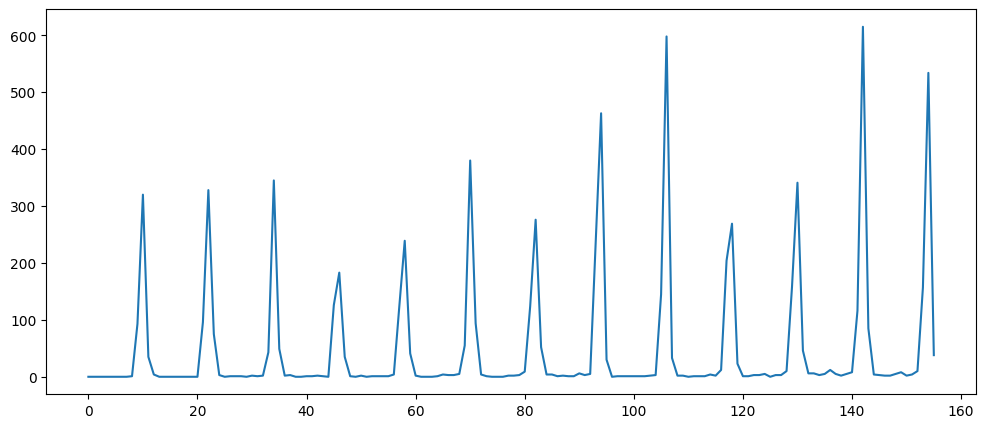

In [ ]:
plt.figure(figsize=(12,5))
time = range(len(total_data))
plt.plot(time, total_data['감염자수'])

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      156 non-null    object
 1   월       156 non-null    object
 2   감염자수    156 non-null    object
 3   평균기온    156 non-null    object
 4   평균최고기온  156 non-null    object
 5   평균최저기온  156 non-null    object
 6   평균상대습도  156 non-null    object
 7   최소상대습도  156 non-null    object
 8   월합강수량   156 non-null    object
dtypes: object(9)
memory usage: 16.3+ KB


In [ ]:
total_data = total_data.astype('float64')

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      156 non-null    float64
 1   월       156 non-null    float64
 2   감염자수    156 non-null    float64
 3   평균기온    156 non-null    float64
 4   평균최고기온  156 non-null    float64
 5   평균최저기온  156 non-null    float64
 6   평균상대습도  156 non-null    float64
 7   최소상대습도  156 non-null    float64
 8   월합강수량   156 non-null    float64
dtypes: float64(9)
memory usage: 16.3 KB


In [ ]:
total_data.columns

Index(['연도', '월', '감염자수', '평균기온', '평균최고기온', '평균최저기온', '평균상대습도', '최소상대습도',
       '월합강수량'],
      dtype='object')

In [ ]:
features = ['평균기온', '평균최고기온', '평균최저기온', '평균상대습도', '최소상대습도',
       '월합강수량']

In [ ]:
X = total_data.loc[:, features]

In [ ]:
Y = total_data[['감염자수']]

In [ ]:
X_max = X.max()
Y_max = Y.max()

X_min = X.min()
Y_min = Y.min()

In [ ]:
X_s = (X-X_min)/(X_max-X_min)
Y_s = (Y-Y_min)/(Y_max-Y_min)

In [ ]:
window_size = 3

In [ ]:
def make_dataset(x_data, y_data, window_size):
  x_list = []
  y_list = []
  for i in range(len(x_data) - window_size):
    x_list.append(np.array(x_data.iloc[i:i+window_size]))
    y_list.append(np.array(y_data.iloc[i+window_size]))
  x_list = torch.Tensor(np.array(x_list))
  y_list = torch.Tensor(np.array(y_list)).view(-1)
  return x_list, y_list

In [ ]:
X_w, Y_w = make_dataset(X_s, Y_s, window_size)

In [ ]:
X_w.shape

torch.Size([153, 3, 6])

In [ ]:
start_year = 2005
pred_year = 2017

In [ ]:
train_num = 12*(pred_year-start_year)-window_size

In [ ]:
X_train = X_w[:train_num].to(device)
X_test = X_w[train_num:].to(device)

y_train = Y_w[:train_num].to(device)
y_test = Y_w[train_num:].to(device)

In [ ]:
train_dataset = TensorDataset(X_train, y_train)

train_loader = DataLoader(train_dataset, batch_size=16)

In [ ]:
for x_data, y_data in train_loader:
  break
print(x_data.shape)
print(y_data.shape)

torch.Size([16, 3, 6])
torch.Size([16])


In [ ]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(input_size = len(features), hidden_size=16, num_layers=5,
                          batch_first = True)

        self.fc1 = nn.Linear(in_features=window_size*16, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=1)

        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(5, x.shape[0], 16).to(device)
        x, hn = self.rnn(x, h0)

        x = x.reshape(x.size(0),-1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        x = x.reshape(-1)

        return x

In [ ]:
# 난수 고정
torch.cuda.manual_seed(123)

model = RNN()
model.to(device)
lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_train_record=[]
loss_test_record=[]

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):

  for x_data, y_data in train_loader:
    optimizer.zero_grad()

    outputs = model(x_data)
    loss_train = nn.MSELoss()(outputs, y_data)

    loss_train.backward()
    optimizer.step()

  outputs_train = model(X_train)
  loss_train = nn.MSELoss()(outputs_train, y_train)

  outputs_test = model(X_test)
  loss_test = nn.MSELoss()(outputs_test, y_test)

  loss_train_record.append(loss_train.item())
  loss_test_record.append(loss_test.item())
  if epoch % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], loss: {loss_train:.5f}, loss_test: {loss_test:.5f}')

Epoch [1/1000], loss: 0.04787, loss_test: 0.08072
Epoch [101/1000], loss: 0.01366, loss_test: 0.02766
Epoch [201/1000], loss: 0.00394, loss_test: 0.00847
Epoch [301/1000], loss: 0.00314, loss_test: 0.00641
Epoch [401/1000], loss: 0.00253, loss_test: 0.00517
Epoch [501/1000], loss: 0.00212, loss_test: 0.00411
Epoch [601/1000], loss: 0.00181, loss_test: 0.00315
Epoch [701/1000], loss: 0.00156, loss_test: 0.00249
Epoch [801/1000], loss: 0.00137, loss_test: 0.00185
Epoch [901/1000], loss: 0.00119, loss_test: 0.00124


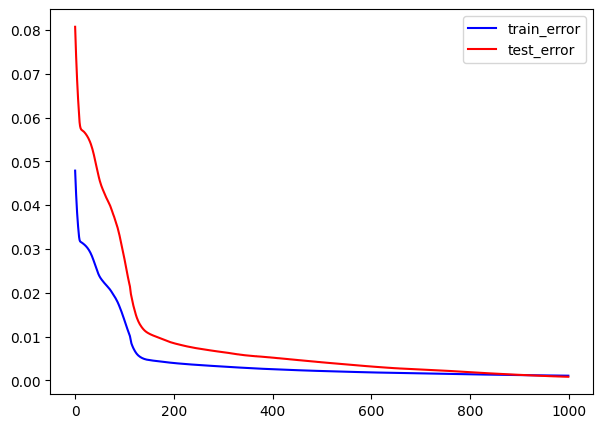

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(loss_train_record,'b',label='train_error')
plt.plot(loss_test_record,'r',label='test_error')
plt.legend()
plt.show()

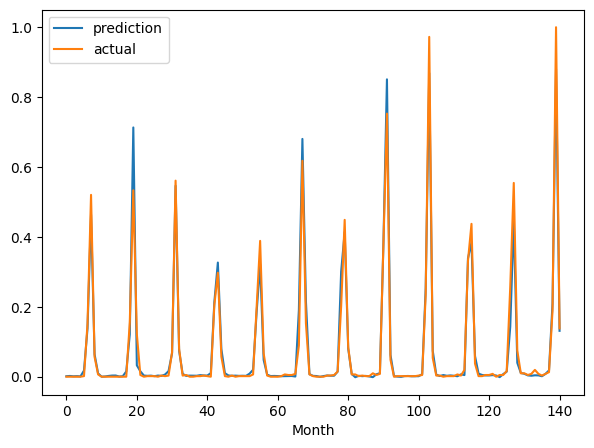

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(outputs_train.to('cpu').detach(), label='prediction')
plt.plot(y_train.to('cpu'), label = 'actual')
plt.xlabel('Month')
plt.legend()
plt.show()

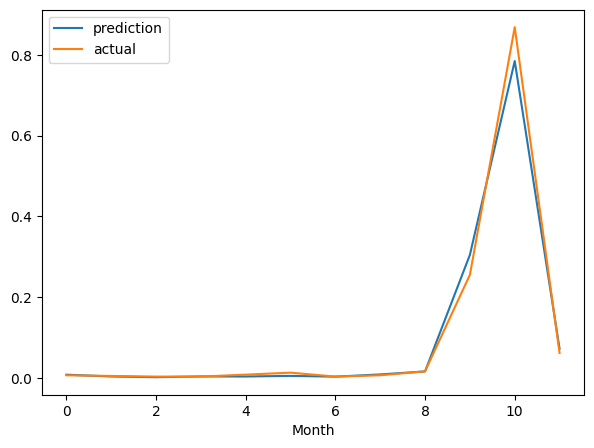

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(outputs_test.to('cpu').detach(), label='prediction')
plt.plot(y_test.to('cpu'), label = 'actual')
plt.xlabel('Month')
plt.legend()
plt.show()

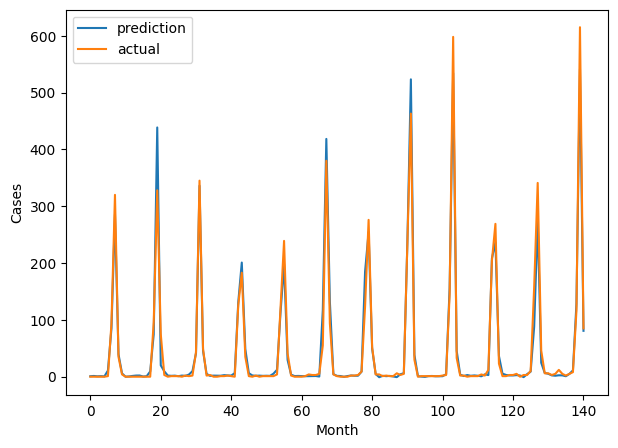

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(torch.Tensor(Y_max-Y_min)*outputs_train.to('cpu').detach()+torch.Tensor(Y_min), label='prediction')
plt.plot(torch.Tensor(Y_max-Y_min)*y_train.to('cpu')+torch.Tensor(Y_min), label = 'actual')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.legend()
plt.show()

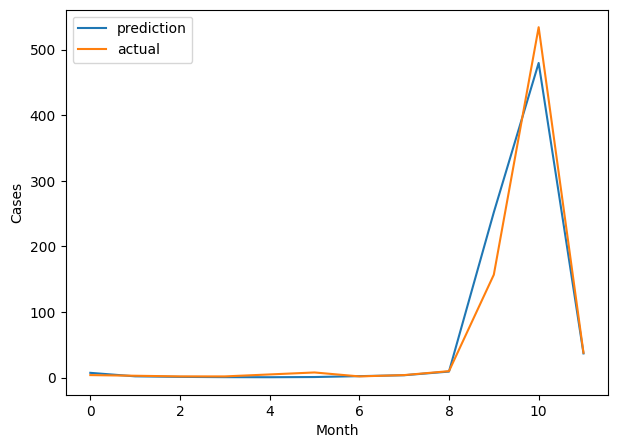

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(torch.Tensor(Y_max-Y_min)*outputs_test.to('cpu').detach()+torch.Tensor(Y_min), label='prediction')
plt.plot(torch.Tensor(Y_max-Y_min)*y_test.to('cpu')+torch.Tensor(Y_min), label = 'actual')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.legend()
plt.show()